<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:** Rock o Hip-Hop? Applica metodi di machine learning per classificare i brani in generi musicali, senza doverli ascoltare :) 

**OBIETTIVO:** 

Utilizzando un set di dati composto da brani di due generi musicali (Hip-Hop e Rock), addestrerai un classificatore per distinguere tra i due generi in base solo alle informazioni sui brani derivate dai dati che hai a disposizione. Per prima cosa utilizzerai Pandas per analizzare i dati, aggregare informazioni (esempio utilizzare costrutti come il groupby) e creare grafici con Seaborn o MatplotLib.

Successivamente, utilizzerai la libreria scikit-learn per prevedere se puoi classificare correttamente il genere di una canzone in base a caratteristiche come energia, acustica, tempo, ballabilità etc..


**Dati a disposizione:**

Qui puoi trovare due fonti dati, uno in formato csv e l'altro in formato json.

https://drive.google.com/drive/folders/1vPd0qBCpWm_QEXM5NRynNrs72-pUuhSn?usp=sharing

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

In [19]:
data = pd.read_csv('dataset.csv')
metrics = pd.read_json('metrics.json')

In [20]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [21]:
metrics.head()
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [22]:
data = data[['track_id','genre_top', 'bit_rate','duration','interest','listens','title']]
data

,track_id,genre_top,bit_rate,duration,interest,listens,title
0,135,Rock,256000,837,2484,1832,Father's Day
1,136,Rock,256000,509,1948,1498,Peel Back The Mountain Sky
2,151,Rock,192000,192,701,148,Untitled 04
3,152,Rock,192000,193,637,98,Untitled 11
4,153,Rock,256000,405,354,424,Hundred-Year Flood
...,...,...,...,...,...,...,...
17729,155063,Hip-Hop,320000,283,1283,1050,Been On
17730,155064,Hip-Hop,320000,250,1077,858,Send Me
17731,155065,Hip-Hop,320000,219,1340,1142,The Question
17732,155066,Hip-Hop,320000,252,2065,1474,Roy


In [23]:
df = pd.merge(left=data, right=metrics, how='inner', on='track_id')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   bit_rate          4802 non-null   int64  
 3   duration          4802 non-null   int64  
 4   interest          4802 non-null   int64  
 5   listens           4802 non-null   int64  
 6   title             4802 non-null   object 
 7   acousticness      4802 non-null   float64
 8   danceability      4802 non-null   float64
 9   energy            4802 non-null   float64
 10  instrumentalness  4802 non-null   float64
 11  liveness          4802 non-null   float64
 12  speechiness       4802 non-null   float64
 13  tempo             4802 non-null   float64
 14  valence           4802 non-null   float64
dtypes: float64(8), int64(5), object(2)
memory usage: 600.2+ KB


In [24]:
df['genre_top'].value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [25]:
X = df.drop(['genre_top','title'], axis=1)
y = df['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_gini = DecisionTreeClassifier().fit(X_train, y_train) # gini impurity as default

y_gini = dt_gini.predict(X_test)

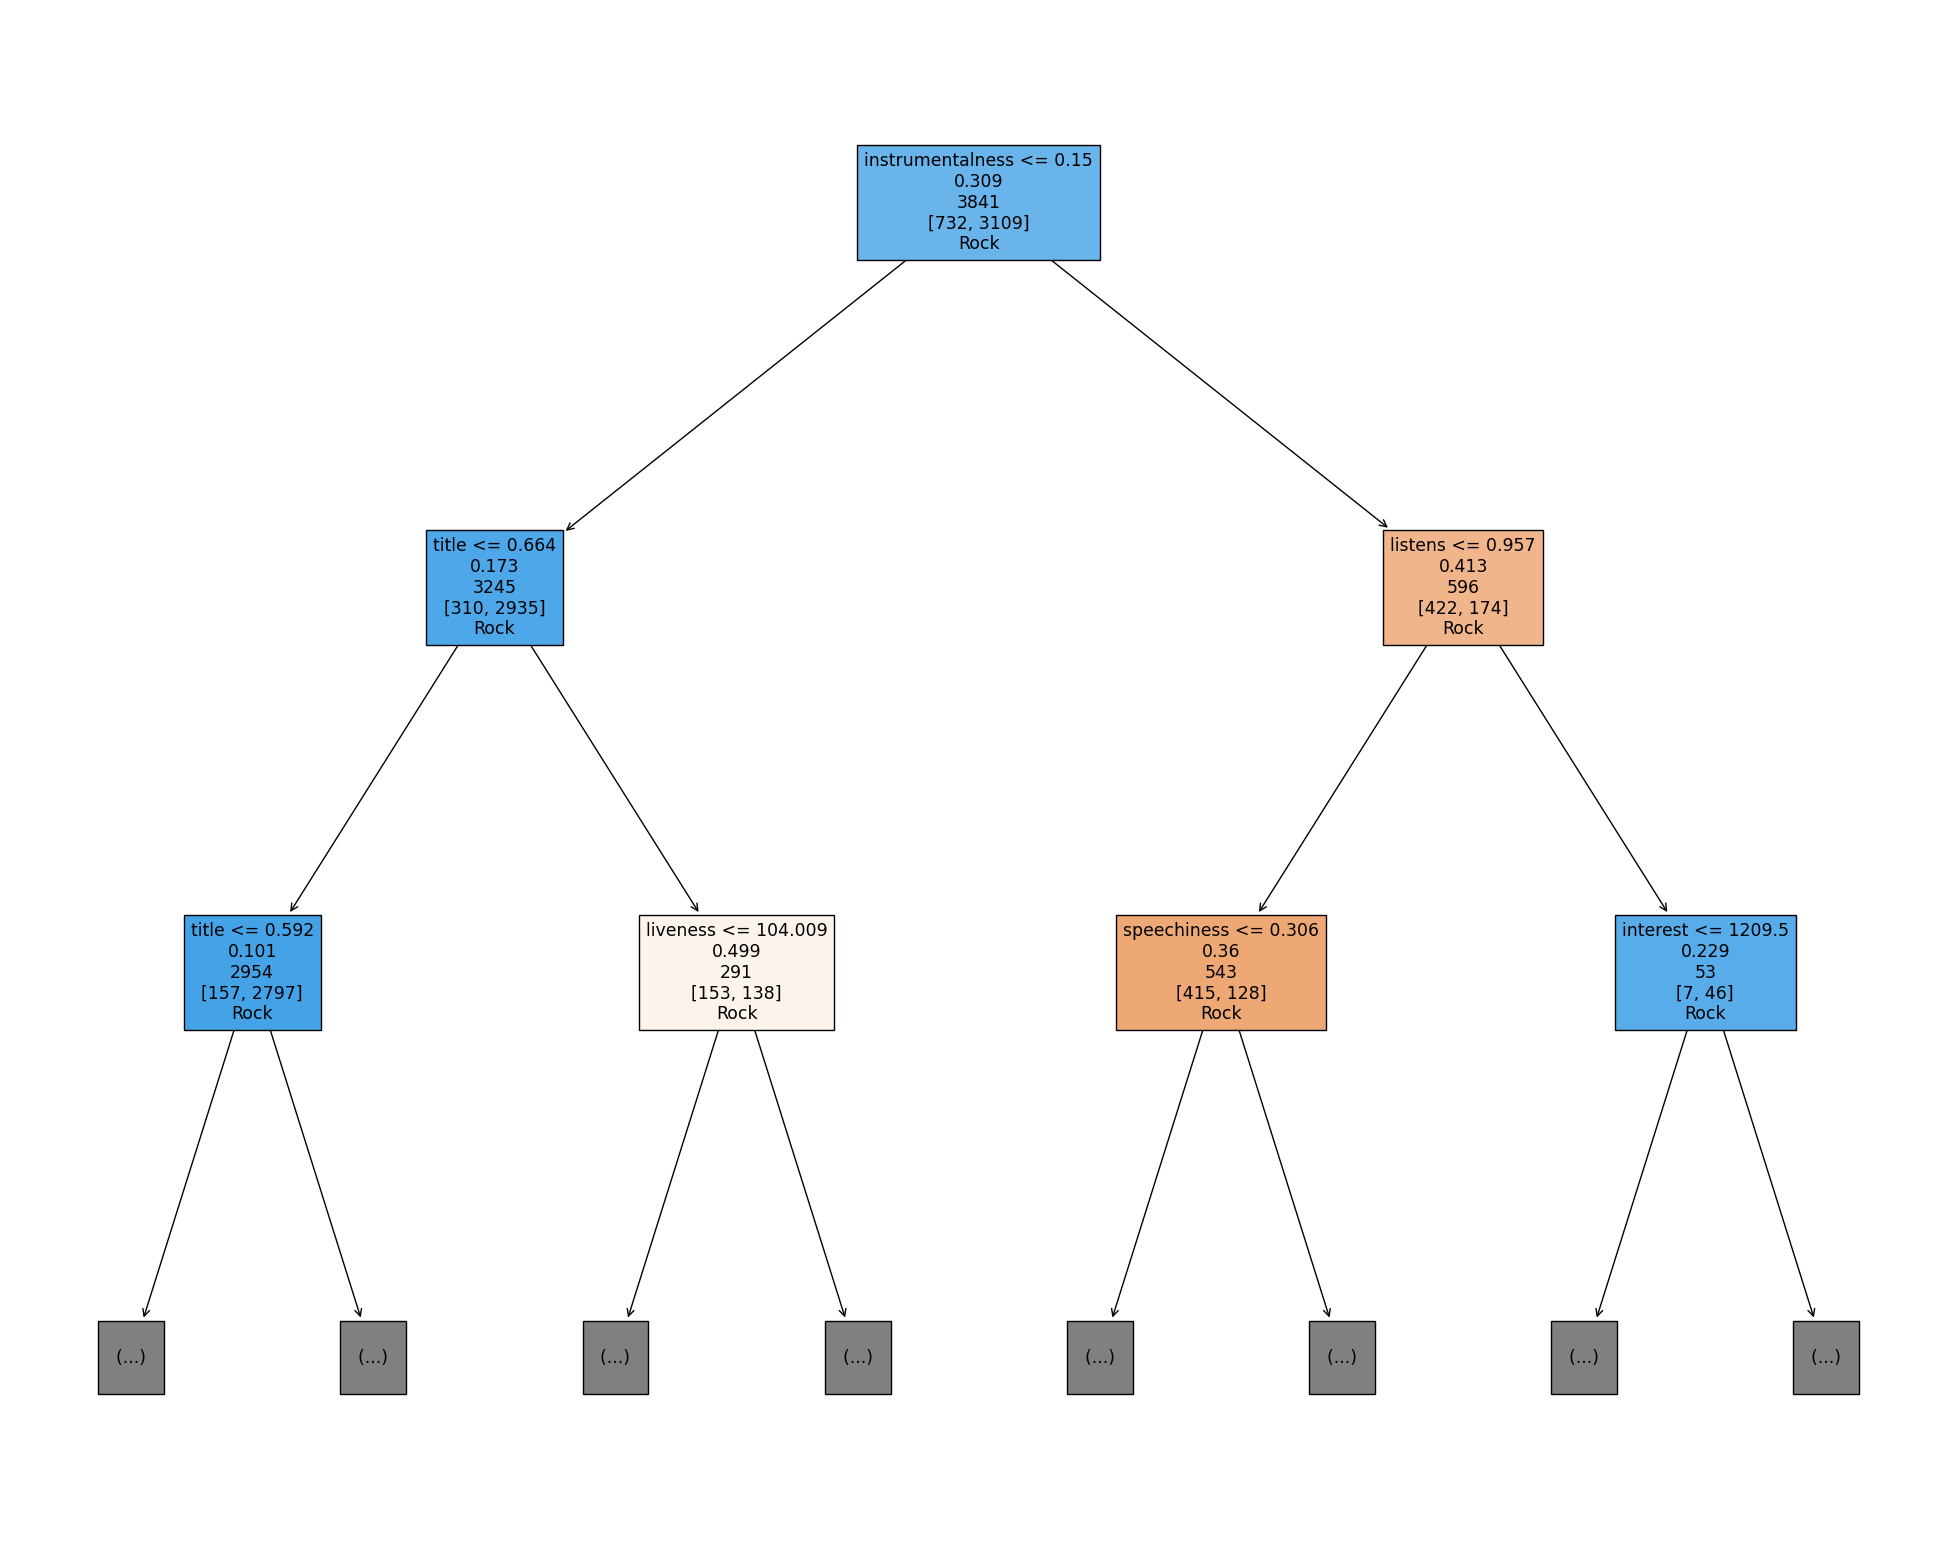

In [26]:
name = df.columns
fig = plt.figure(figsize=(25,20))
plot_tree(dt_gini,max_depth=2,feature_names=name, class_names=y,label=None, filled=True)
plt.show()

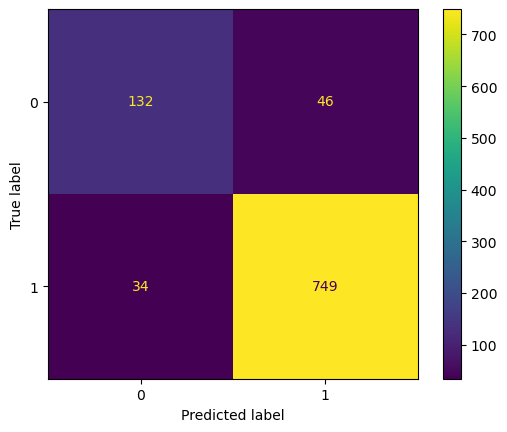

In [27]:
cf_matrix = mt.confusion_matrix(y_test, y_gini)
cf_display = mt.ConfusionMatrixDisplay(cf_matrix).plot()

In [28]:
print(f'precision: {mt.accuracy_score(y_test,y_gini)}')
print(f'precision: {mt.precision_score(y_test,y_gini, average=None)}') # what proportion of positive identification was actually correct ?
print(f'recall: {mt.recall_score(y_test,y_gini, average=None)}') # what proportion of actual positie is actually correct ? 

precision: 0.9167533818938606
precision: [0.79518072 0.94213836]
recall: [0.74157303 0.95657727]


accuracy: 0.9094693028095734
precision: [0.77575758 0.93718593]
recall: [0.71910112 0.95274585]


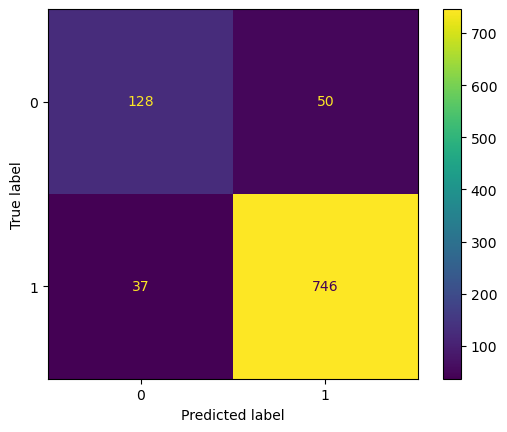

In [29]:
dt_entropy = DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train) # shannon entropy
y_entr = dt_entropy.predict(X_test)

cf_matrix = mt.confusion_matrix(y_test, y_entr)
cf_display = mt.ConfusionMatrixDisplay(cf_matrix).plot()

print(f'accuracy: {mt.accuracy_score(y_test,y_entr)}')
print(f'precision: {mt.precision_score(y_test,y_entr, average=None)}')
print(f'recall: {mt.recall_score(y_test,y_entr, average=None)}')

precision: 0.9542143600416233
precision: [0.94078947 0.95673671]
recall: [0.80337079 0.98850575]


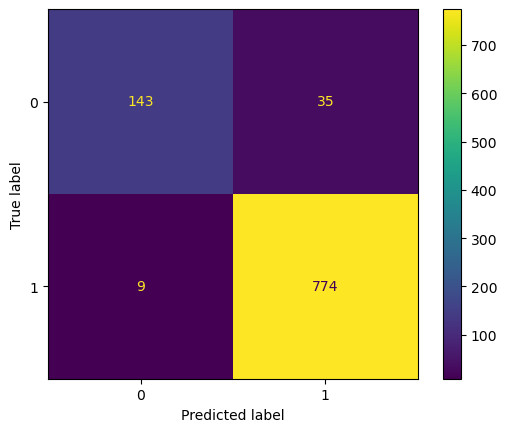

In [30]:
rfc = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
y_pred = rfc.predict(X_test)

cf_matrix = mt.confusion_matrix(y_test, y_pred)
cf_display = mt.ConfusionMatrixDisplay(cf_matrix).plot()

print(f'precision: {mt.accuracy_score(y_test,y_pred)}')
print(f'precision: {mt.precision_score(y_test,y_pred, average=None)}')
print(f'recall: {mt.recall_score(y_test,y_pred, average=None)}')

accuracy: 0.9448491155046826
precision: [0.91946309 0.94950739]
recall: [0.76966292 0.98467433]


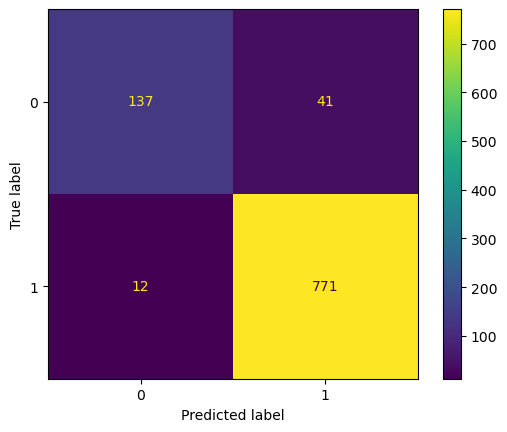

In [31]:
adb = AdaBoostClassifier().fit(X_train,y_train)
y_adb = adb.predict(X_test)

cf_matrix = mt.confusion_matrix(y_test, y_adb)
cf_display = mt.ConfusionMatrixDisplay(cf_matrix).plot()

print(f'accuracy: {mt.accuracy_score(y_test,y_adb)}')
print(f'precision: {mt.precision_score(y_test,y_adb, average=None)}')
print(f'recall: {mt.recall_score(y_test,y_adb, average=None)}')

In [32]:
tp, fn, fp, tn = cf_matrix.ravel()
print(tp, fp, fn, tn)
print(f'precision:{tp/(tp+fp)}')
print(f'recall:{tp/(tp+fn)}')

137 12 41 771
precision:0.9194630872483222
recall:0.7696629213483146


accuracy: 0.9646201873048907
precision: [0.93902439 0.96988708]
recall: [0.86516854 0.98722861]


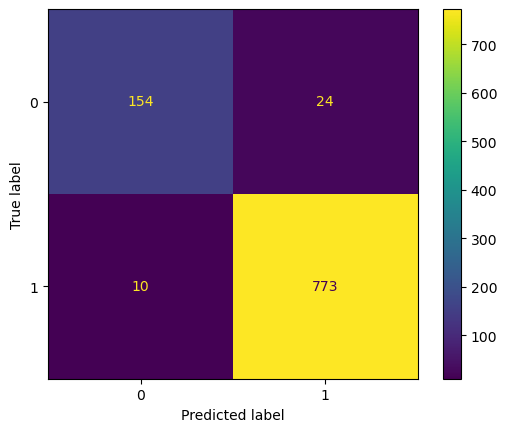

In [33]:
y_train_transf = LabelEncoder().fit_transform(y_train)
y_test_transf = LabelEncoder().fit_transform(y_test)

xgbo = xgb.XGBClassifier().fit(X_train,y_train_transf)
y_xgb = xgbo.predict(X_test)

cf_matrix = mt.confusion_matrix(y_test_transf, y_xgb)
cf_display = mt.ConfusionMatrixDisplay(cf_matrix).plot()

print(f'accuracy: {mt.accuracy_score(y_test_transf,y_xgb)}')
print(f'precision: {mt.precision_score(y_test_transf,y_xgb, average=None)}')
print(f'recall: {mt.recall_score(y_test_transf,y_xgb, average=None)}')